In [13]:
library(forecast)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [60]:
data = read.csv('sessionsbysource.tsv', sep='\t')
head(data)

ga.source,ga.date,ga.sessions
(direct),20170103,260192
(direct),20170104,258984
(direct),20170117,248585
(direct),20170201,248337
(direct),20170110,244107
(direct),20170207,241304


In [61]:
direct = data[data$ga.source == '(direct)', ]

In [62]:
direct$ga.date = as.character(direct$ga.date)
direct$ga.date = as.Date(direct$ga.date, format='%Y%m%d')
direct = direct[order(direct$ga.date),]

In [63]:
direct$ga.source = NULL
rownames(direct) = direct$ga.date
direct

,ga.date,ga.sessions
2016-12-01,2016-12-01,178182
2016-12-02,2016-12-02,159042
2016-12-03,2016-12-03,137913
2016-12-04,2016-12-04,162842
2016-12-05,2016-12-05,196950
2016-12-06,2016-12-06,207690
2016-12-07,2016-12-07,179245
2016-12-08,2016-12-08,164622
2016-12-09,2016-12-09,148058
2016-12-10,2016-12-10,123352


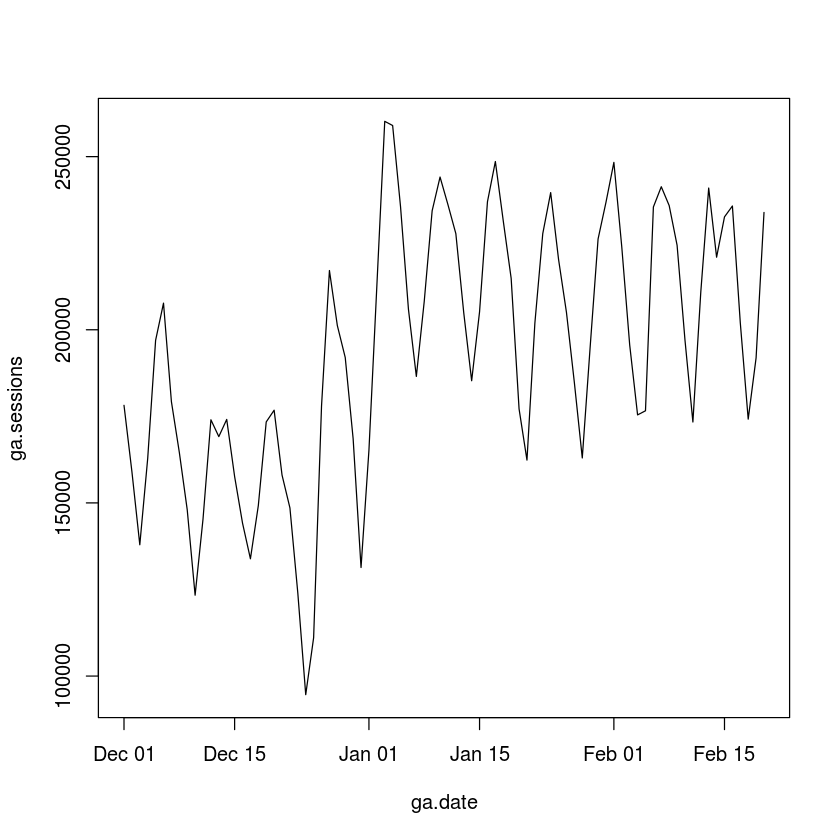

In [71]:
plot(direct, type='l')

In [74]:
direct$ga.date = NULL

In [81]:
model = auto.arima(direct)
model

ERROR: Error in auto.arima(direct, frequency = 7): No suitable ARIMA model found


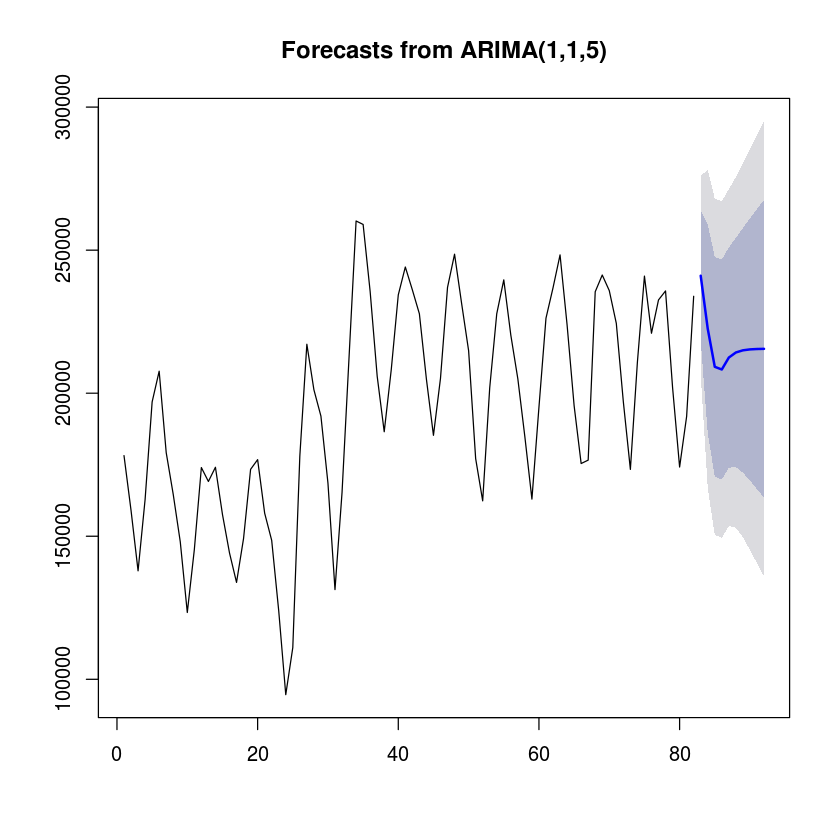

In [80]:
plot(forecast(model))